# Fix pathing

In [1]:
import sys


sys.path.append("../..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))))


# Imports

In [3]:
import json
import matplotlib.pyplot as plt


# Constants

In [4]:
#FOLDER_NAMES = ["exp_3_ga_least_active", "exp_3_ma_least_active", "exp_3_na_least_active", "exp_3_mn_least_active"]
#FOLDER_NAMES = ["exp_3_ga_avg_active", "exp_3_ma_avg_active", "exp_3_na_avg_active", "exp_3_mn_avg_active"]
FOLDER_NAMES = ["exp_3_ga_most_active", "exp_3_ma_most_active", "exp_3_na_most_active", "exp_3_mn_most_active"]

LABELS = ["GA", "MA", "NSGA-II", "Memetic NSGA-II"]
COLORS = ["green", "blue", "red", "black"]

FOLDER_PATH = os.path.join(os.path.dirname(constants.PROJECT_DIRECTORY_PATH), "Simulator", "data")


# Methods

In [5]:
def load_json():
    dataset = []

    for folder_name in FOLDER_NAMES:
        with open(os.path.join(FOLDER_PATH, folder_name, "heuristic.json"), 'r') as file:
            dataset.append(json.load(file))

    return dataset


In [6]:
def plot_fitness_for_objects(dataset, xlim_right=None):
    plt.figure(figsize=(12, 6))

    # Plot scatter and fit polynomial for each dataset
    for dataset, label, color in zip(dataset, LABELS, COLORS):
        generations = list(range(len(dataset['diversity'])))
        fitness = [dataset['percentage_violations'][generation][0] for generation in generations]
        plt.plot(generations, fitness, color=color, label=f"{label}")

        # Fit and plot a polynomial
        #coeffs = np.polyfit(generations, fitness, degree)
        #polynomial = np.poly1d(coeffs)
        #plt.plot(generations, polynomial(generations), color=color)
    
    if xlim_right is not None:
        plt.xlim(left=0, right=xlim_right)
    else:
        plt.xlim(left=0)

    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    title = 'Best Fitness Over Generations'
    plt.title(title, fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
    plt.grid(True)
    plt.legend(loc="upper right")

    plt.savefig(os.path.join(constants.PROJECT_DIRECTORY_PATH, "source", "analysis", "plots", title + ".png"), dpi=300, bbox_inches='tight')

    plt.show()


# Main

In [7]:
dataset = load_json()

for key, value in dataset[0].items():
    print(key)


avg_response_time_rural_a
avg_response_time_rural_h
avg_response_time_rural_v1
avg_response_time_urban_a
avg_response_time_urban_h
avg_response_time_urban_v1
diversity
fitness
percentage_violations
percentage_violations_rural
percentage_violations_urban


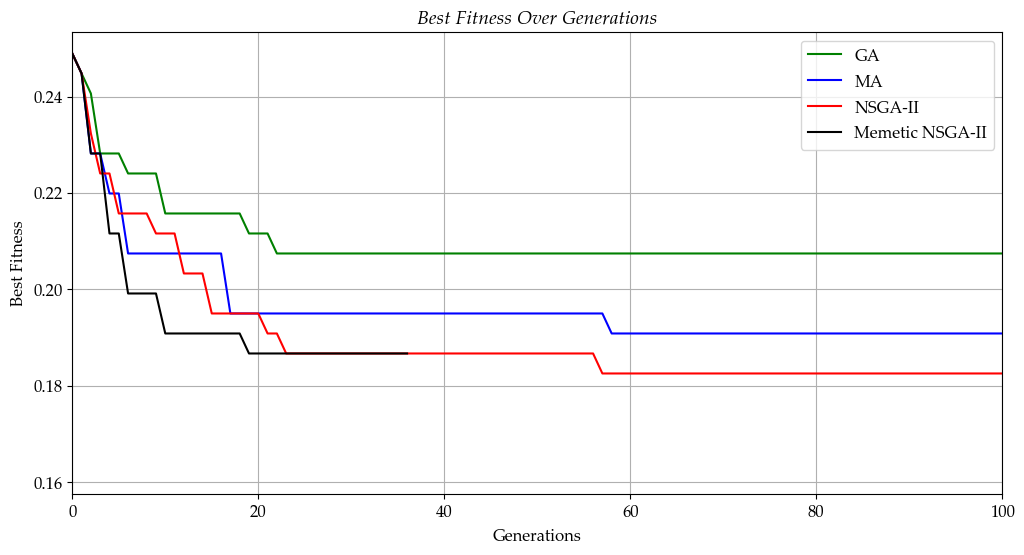

In [8]:
plot_fitness_for_objects(dataset, xlim_right=100)


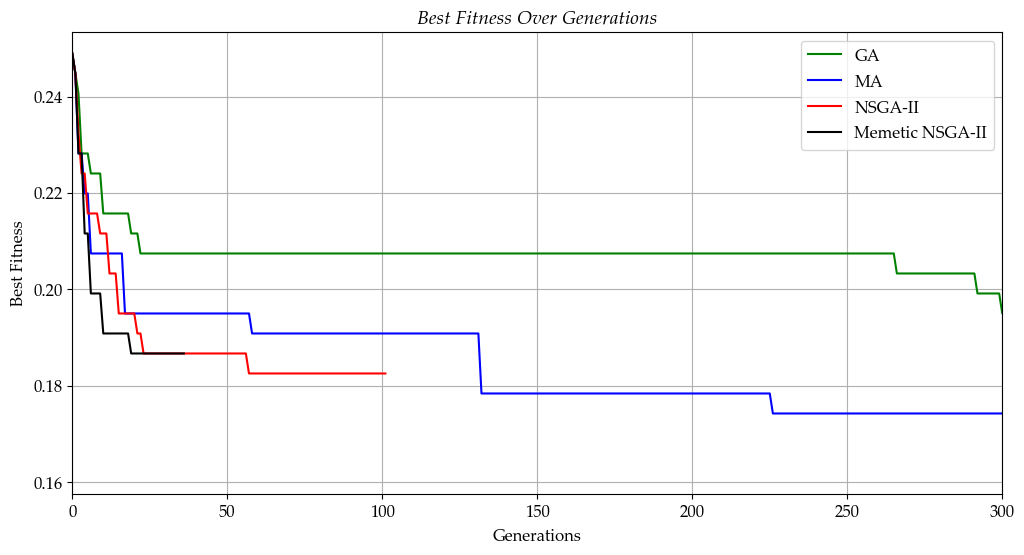

In [9]:
plot_fitness_for_objects(dataset, xlim_right=300)


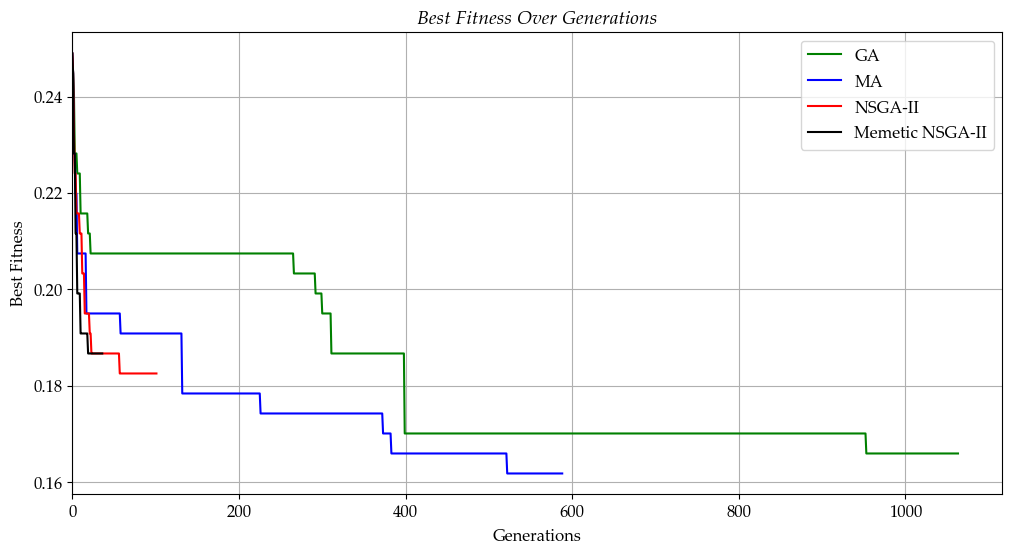

In [10]:
plot_fitness_for_objects(dataset)
